In [4]:
import pickle
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import re
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [5]:
pick = pickle.load(open("./ALLDATA_dna.pickle","rb"))

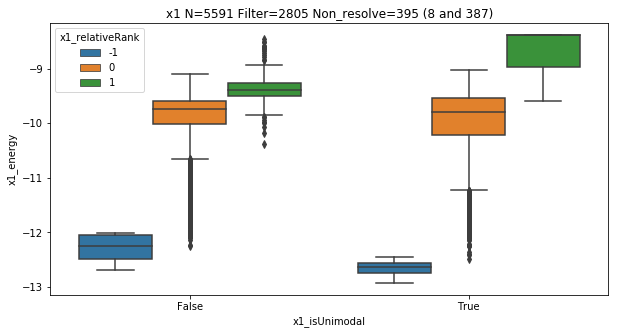

x1 2805 5591 395
False    2805
Name: x1_isOneHitWonder, dtype: int64


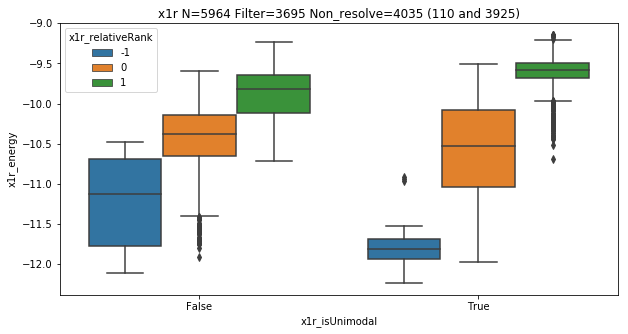

x1r 3695 5964 4035
False    3695
Name: x1r_isOneHitWonder, dtype: int64


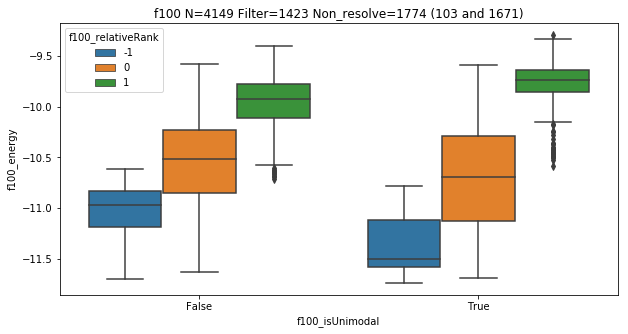

f100 1423 4149 1774
False    1423
Name: f100_isOneHitWonder, dtype: int64


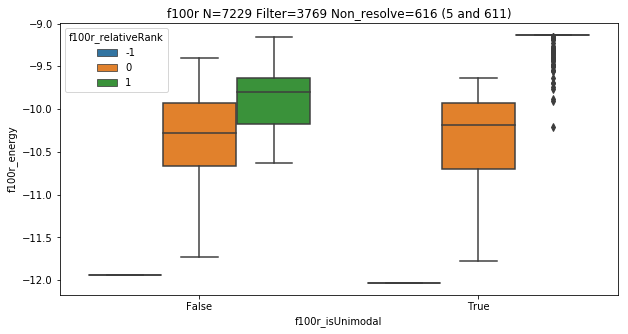

f100r 3769 7229 616
False    3769
Name: f100r_isOneHitWonder, dtype: int64


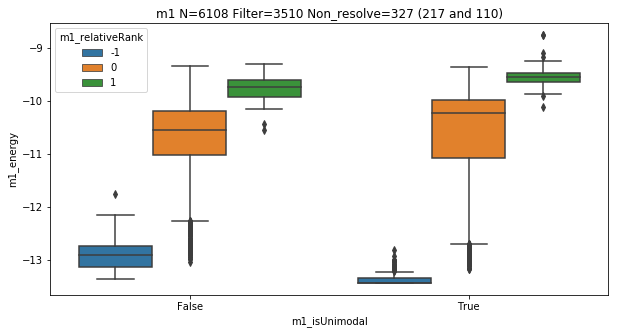

m1 3510 6108 327
False    3510
Name: m1_isOneHitWonder, dtype: int64


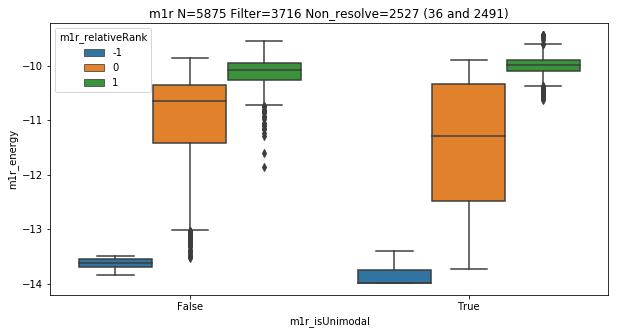

m1r 3716 5875 2527
False    3716
Name: m1r_isOneHitWonder, dtype: int64


In [23]:
Temperature = 293.0
R = 1.9872036/1000.0

for (df,name) in zip(pick[0],pick[1]):
    if "pilot" in name:
        continue
    if "x100" in name:
        continue
    #Get Unresolved
    
    #Get Rank
    Unresl = list(df.filter(regex="relativeRank").columns)[0]
    #Get Values
    ExpVal = list(df.filter(regex="expectedValue").columns)[0]
    #Get Count
    Tot = list(df.filter(regex="CN_tot").columns)[0]
    #Get Uni
    UniMod = list(df.filter(regex="nimodal").columns)[0]
    #Get One Gate
    OneGate = list(df.filter(regex="isOneHitWonder").columns)[0]
    
    #Get Mapping to energy
    MapDf = pd.read_csv("./"+name+".csv")
    slope, intercept, r_value, p_value, std_err =  stats.linregress(MapDf[name+"_expectedValue"], MapDf[name+"_energy"])
    
    #Create enery
    df[name+"_energy"] = df[ExpVal]*slope+intercept
    Ener = name+"_energy"
    
    df[name+"_Kd_nm"] = np.exp(df[name+"_energy"]/(R*Temperature))*1000000000.0
    
    figsize(10,5)
    
    
    for rank in np.unique(df[Unresl]):
        break
        #if rank == 0:continue
        subdf = df[df[Unresl] == rank]
        plt.hist(subdf[subdf[UniMod] == True][Ener],normed=True,histtype='step')
        plt.hist(subdf[subdf[UniMod] == False][Ener],normed=True,histtype='step')
        plt.title("%s rank=%d N=%d" % (name,rank,len(df[df[Unresl] == rank])))
        plt.show()
        
        
    #ToKeep
    subdf = df[(df[UniMod] == True) & (df[OneGate] == False)]
    
    #subdf = df
    #plt.hist(subdf[subdf[UniMod] == True][Ener],normed=True)
    #plt.show()
    
    #plt.hist(np.log10(subdf[name+"_Kd_nm"]))
    #plt.title([np.sum(subdf[name+"_Kd_nm"] < 5),np.sum(subdf[name+"_Kd_nm"] > 100)])
    #plt.show()
    
    #ind = (subdf[name+"_Kd_nm"] < 5) | (subdf[name+"_Kd_nm"] > 500)
    
    binDF = subdf[subdf.protein.str.contains("\*") == False]
    
    binDF.to_csv("./"+name+"_nonresolv.csv")
    
    sns.boxplot(y=df[Ener],hue=Unresl,x=UniMod,data=df[[Ener,Unresl,UniMod,OneGate]].dropna())
    plt.title("%s N=%d Filter=%d Non_resolve=%d (%d and %d)" % 
              (name,len(df),len(binDF),np.sum(df[Unresl]!=0),np.sum(df[Unresl]<0),np.sum(df[Unresl]>0)))
    plt.show()
    
    
    
    print(name,len(binDF),len(df),np.sum(df[Unresl]!=0))
    print(binDF[OneGate].value_counts())
